# Tutorial on the dataset and basic functions

### Import the libraries

In [1]:
import json
import sys
import pandas as pd
import collections 
import os
import numpy as np
from itertools import chain
from itertools import combinations
#sys.path.insert(0, '..')
sys.path.append('/Users/l.kaack/Documents/Policy_coding/Temporary/NLP_Spark/')
from src.experiment_utils.helper_classes import token, span, repository
from src.d02_corpus_statistics.corpus import Corpus
from definitions import ROOT_DIR
from pyannote.core import Segment

## Small Tutorial



### Classes and Dataframe

All the information is now stored in a dataframe called "stat_df" containing the string of the directory path, the raw text, and all the annotations (in form of list of spans) starting with the Curation:

In [2]:
    
dataframe_dir = os.path.join(ROOT_DIR,'data/02_processed_to_dataframe', 'preprocessed_dataframe.pkl')
stat_df = pd.read_pickle(dataframe_dir)
stat_df.head()

,Policy,Text,Tokens,Article_State,Finished_Annotators,Curation,Alisha,Fride,Onerva,Fabian,Sebastian,Lynn,Joel
EU_32018R1999_Title_0_Chapter_3_Section_0_Article_15,,article 15\r\nlong-term strategies\r\n1. by ...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[Alisha, Fride]",[span id:CUR0 annotator:Curation layer:Instrum...,[span id:A1 annotator:Alisha layer:Instrumentt...,[span id:B1 annotator:Fride layer:Instrumentty...,,,,,
EU_32009L0028_Title_0_Chapter_0_Section_0_Article_19,,article 19\r\ncalculation of the greenhouse ga...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[Alisha, Fabian]",[span id:CUR89 annotator:Curation layer:Instru...,[span id:A82 annotator:Alisha layer:Instrument...,,[],[span id:D1 annotator:Fabian layer:Instrumentt...,,,
EU_32009L0028_Title_0_Chapter_0_Section_0_Article_25,,article 25\r\ncommittees\r\n1. except in the...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[Alisha, Fabian]",[span id:CUR147 annotator:Curation layer:Polic...,[span id:A133 annotator:Alisha layer:Policydes...,,[],[span id:D47 annotator:Fabian layer:Policydesi...,,,
EU_32019L0944_Title_0_Chapter_2_Section_0_Article_09,,article 9\r\npublic service obligations\r\n1. ...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[Alisha, Fabian]",[span id:CUR159 annotator:Curation layer:Instr...,[span id:A147 annotator:Alisha layer:Instrumen...,,[],[span id:D55 annotator:Fabian layer:Instrument...,,,
EU_32019L0944_Title_0_Chapter_2_Section_0_Article_08,,article 8\r\nauthorisation procedure for new c...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[Alisha, Fabian]",[span id:CUR218 annotator:Curation layer:Instr...,[span id:A178 annotator:Alisha layer:Instrumen...,,[],[span id:D79 annotator:Fabian layer:Instrument...,,,


In [3]:
stat_df.shape

(448, 13)

The spans of each paragraph are stored in list:

In [4]:
stat_df['Curation'][2]

[span id:CUR147 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Addressee_default start:12 stop:22 text:committees,
 span id:CUR148 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Authority_default start:81 stop:91 text:commission,
 span id:CUR149 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Addressee_default start:117 stop:154 text:committee on renewable energy sources,
 span id:CUR150 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Authority_default start:237 stop:247 text:commission,
 span id:CUR151 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Addressee_default start:273 stop:331 text:committee on the sustainability of biofuels and bioliquids,
 span id:CUR152 annotator:Curation layer:Policydesigncharacteristics type:Reference tag:Ref_OtherPolicy start:402 stop:422 text:decision 1999/468/ec,
 span id:CUR153 annotator:Curation layer:Policydesigncharacteristics type:Reference tag:R

Each span has a layer, type, tag, start, stop, and the annotatet text (raw)

In [5]:
stat_df['Curation'][2][2]

span id:CUR149 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Addressee_default start:117 stop:154 text:committee on renewable energy sources

Each tag further has a repository, list of all the tokens and an annotator



In [6]:
stat_df['Curation'][2][2].rep

policy:EU_32009L0028 title:Title_0 chapter:Chapter_0 section:Section_0 article:Article_25

In [7]:
stat_df['Curation'][2][2].tokens

[start:117 stop:126 text:committee tag_count:1,
 start:127 stop:129 text:on tag_count:1,
 start:130 stop:139 text:renewable tag_count:2,
 start:140 stop:146 text:energy tag_count:2,
 start:147 stop:154 text:sources tag_count:2]

In [8]:
stat_df['Curation'][2][2].annotator

'Curation'

It is important to note that the token objects reside in the separate column tokens, the list of tokens for each tag is just a pointer to those objects residing in the token column.

Each Token has a start, stop, text and a tag_count. The tag_count counts how many times this specific token has been labeled.

In [11]:
stat_df['Tokens'][2][49]

start:257 stop:265 text:assisted tag_count:0

Repository's can be created trought the normal constructor **init**(self, policy, title, chapter, section, article) , or trough the classmethod **from_repository_name**(cls, rep_str), taking only a big string of the repository name. 

### Conditional Repository

The repository class can be used to create conditional repositorys, which are usefull to search in all the paragraphs matching a certain condition. Let's go on and create a test repository:

In [12]:
test_dir = repository.from_repository_name("EU_32008R1099_Title_0_Chapter_0_Section_0_Article_03")
test_dir

policy:EU_32008R1099 title:Title_0 chapter:Chapter_0 section:Section_0 article:Article_03

Let's now create a conditional repository. On each hirarchy, I can either match a certain name or I can match all the names by inserting 'None'. Simply speaking, we match all repositorys with the attributes given other than 'None. Let's assume I want to match all the tags in 'EU_32008R1099' I would create a repository like this:

In [13]:
test_dir = repository(policy = 'EU_32008R1099', title = None, chapter = None, section = None, article = None)
test_dir

policy:EU_32008R1099 title:None chapter:None section:None article:None

or simply

In [14]:
test_dir = repository(policy = 'EU_32008R1099')
test_dir

policy:EU_32008R1099 title:None chapter:None section:None article:None

If I want to match all the tags that are stored in the first article in all the policy's, titles, chapters and sections

In [15]:
test_dir = repository( article = 'Article_01')
test_dir

policy:None title:None chapter:None section:None article:Article_01

## Class Evaluator and evaluation functions

All the functions calculating statistics are contained the class "Corpus", it's only class member is the dataframe. The only constructor argument is a dataframe created by the load data script (NLP_spark/src/d01_data/load_data.py). To start the evaluation process, a new object of the class "Corpus" must be created.

In [16]:
test_corpus = Corpus(stat_df)

In [17]:
test_corpus.df.shape

(412, 13)

By default, "Whereas" (recital) and "Front" articles are excluded. In case they should be included, initizialize the the test_corpus by setting front_and_whereas = True:

In [18]:
test_corpus_front_and_whereas = Corpus(stat_df, front_and_whereas = True)

In [19]:
test_corpus_front_and_whereas.df.shape

(448, 13)

### Drop Articles

The Corpus class allows to drop certain articles based on matching, e.g all the articles that **contain** the given string are droped. The string can be either passed as a single string or a list of strings.

In [20]:
matching_strings = ['front', 'Whereas']
test_corpus_front_and_whereas.drop_articles_based_on_string(matching_strings)

In [21]:
test_corpus_front_and_whereas.df.shape

(412, 13)

## Statistics

The most important function is the member function get_span_list(self, conditional_rep, columns, item, value). This functions takes a conditional repository (explained before), a item which can be either 'class, 'type' or 'tag' and a value. E.g item = 'layer' and value = 'Policydesigncharacteristics' or item = 'type and value ='Compliance' and item = 'tag' and value = 'Form_monitoring'. 

The function returns a list of all the tags in all the paragraphs matching the conditional repository and matching the item and value given. E.g I want to match all the tags of type 'Policydesigncharacteristics' in the policy 'EU_32008R1099':

In [22]:
test_dir = repository('EU_32008R1099')
test_corpus.get_span_list(conditional_rep = test_dir, annotators = 'annotators')


[span id:A1652 annotator:Alisha layer:Instrumenttypes type:InstrumentType tag:RegulatoryInstr start:1343 stop:1363 text:regulatory procedure,
 span id:A1653 annotator:Alisha layer:Instrumenttypes type:InstrumentType tag:RegulatoryInstr start:1525 stop:1545 text:regulatory procedure,
 span id:A1654 annotator:Alisha layer:Policydesigncharacteristics type:Compliance tag:Form_monitoring start:21 stop:38 text:energy statistics,
 span id:A1655 annotator:Alisha layer:Policydesigncharacteristics type:Compliance tag:Form_monitoring start:56 stop:78 text:consumption statistics,
 span id:A1656 annotator:Alisha layer:Policydesigncharacteristics type:Objective tag:Objective_QualIntention_noCCM start:100 stop:181 text:improving the quality of renewable energy and final energy consumption statistics,
 span id:A1657 annotator:Alisha layer:Policydesigncharacteristics type:Compliance tag:Form_monitoring start:125 stop:181 text:renewable energy and final energy consumption statistics,
 span id:A1658 anno

If one doesn't want to specify the item and the value, and instead wants to match all the tags that match the conditional repository, one can put 'None':

In [23]:
test_corpus.get_span_list(conditional_rep = test_dir, item = 'layer', value = 'Policydesigncharacteristics')

[span id:CUR2405 annotator:Curation layer:Policydesigncharacteristics type:Compliance tag:Form_monitoring start:21 stop:38 text:energy statistics,
 span id:CUR2406 annotator:Curation layer:Policydesigncharacteristics type:Compliance tag:Form_monitoring start:43 stop:78 text:final energy consumption statistics,
 span id:CUR2407 annotator:Curation layer:Policydesigncharacteristics type:Objective tag:Objective_QualIntention_noCCM start:100 stop:181 text:improving the quality of renewable energy and final energy consumption statistics,
 span id:CUR2408 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Authority_monitoring start:187 stop:208 text:commission (eurostat),
 span id:CUR2409 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Addressee_default start:187 stop:208 text:commission (eurostat),
 span id:CUR2410 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Authority_monitoring start:187 stop:197 text:commission,
 span id:CUR2411 

All the other member functions are based on the Corpus.get_tag_list member function, and they take the same inputs. 

get_span_distro(self, conditional_rep, item, value, return_format) returns the distribution of spans of a tag_list either in dict{span:count} or list format. The lenght of the span can be calculated on character or token level:

In [24]:
test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'dict', level = 'character')

{10: 32,
 19: 17,
 20: 16,
 8: 14,
 13: 14,
 9: 14,
 17: 13,
 21: 12,
 11: 11,
 6: 10,
 18: 8,
 4: 8,
 15: 7,
 35: 6,
 27: 6,
 12: 6,
 7: 5,
 16: 4,
 25: 4,
 5: 4,
 31: 3,
 22: 3,
 23: 2,
 14: 2,
 24: 2,
 28: 2,
 45: 2,
 36: 2,
 81: 1,
 59: 1,
 58: 1,
 34: 1,
 99: 1,
 72: 1,
 76: 1,
 30: 1,
 108: 1,
 29: 1,
 42: 1,
 33: 1,
 86: 1}

In [25]:
test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'list')

[0,
 0,
 0,
 8,
 4,
 10,
 5,
 14,
 14,
 32,
 11,
 6,
 14,
 2,
 7,
 4,
 13,
 8,
 17,
 16,
 12,
 3,
 2,
 2,
 4,
 0,
 6,
 2,
 1,
 1,
 3,
 0,
 1,
 1,
 6,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [26]:
test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'dict', level = 'token')

{1: 98,
 2: 84,
 4: 18,
 3: 16,
 6: 6,
 5: 5,
 9: 4,
 7: 3,
 11: 2,
 10: 1,
 8: 1,
 13: 1,
 14: 1,
 12: 1,
 15: 1}

This span distribution can also be plottet:

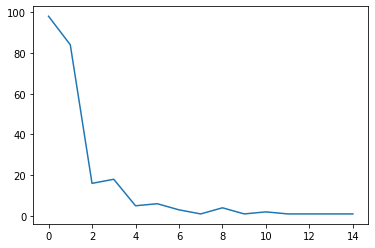

In [30]:
import matplotlib.pyplot as plt
plt.plot(test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'list', level = 'token'))
plt.show()

The function get_span_count(self, article, item, value) returns the number of tags in the tag_list. This can be used to retrieve the amount of tags matching a certain condition, e.g. all the tags in the layer 'Policydesigncharacteristics' in the policy 'EU_32008R1099':

<div class="alert alert-block alert-info">
<b>To do:</b> If a span or token is labeled twice is this is also counted twice?
</div>

In [31]:
test_corpus.get_span_count(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

199

The function get_tokens_from_span_list(self, conditional_rep, item, value) returns a list of all the tokens in a taglist:

In [32]:
test_corpus.get_tokens_from_span_list(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

[start:1090 stop:1092 text:of tag_count:1,
 start:793 stop:803 text:statistics tag_count:2,
 start:485 stop:489 text:1999 tag_count:1,
 start:354 stop:363 text:producers tag_count:3,
 start:32 stop:42 text:commission tag_count:1,
 start:868 stop:878 text:statistics tag_count:2,
 start:1082 stop:1089 text:release tag_count:1,
 start:374 stop:384 text:commission tag_count:2,
 start:173 stop:177 text:data tag_count:1,
 start:142 stop:145 text:and tag_count:1,
 start:323 stop:330 text:primary tag_count:1,
 start:354 stop:355 text:) tag_count:1,
 start:428 stop:435 text:council tag_count:1,
 start:524 stop:532 text:annually tag_count:1,
 start:48 stop:54 text:states tag_count:1,
 start:491 stop:498 text:nuclear tag_count:1,
 start:558 stop:567 text:transport tag_count:1,
 start:216 stop:220 text:2009 tag_count:2,
 start:295 stop:299 text:2005 tag_count:2,
 start:356 stop:358 text:no tag_count:1,
 start:110 stop:113 text:the tag_count:1,
 start:152 stop:158 text:energy tag_count:1,
 start:38

The function get_token_count_from_span_list returns the amount of tokens in the tag_list:

In [33]:
test_corpus.get_token_count_from_span_list(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

382

The function most_frequent_labeled_tokens(self, conditional_rep, item, value) returns a dict of all the most frequent tokens of a span_list:

In [34]:
test_corpus.most_frequent_labeled_tokens(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

{'statistics': 56,
 'energy': 29,
 'commission': 23,
 'eurostat': 19,
 '/': 15,
 'the': 14,
 'national': 14,
 'and': 13,
 'of': 12,
 '(': 12,
 ')': 12,
 'member': 12,
 'states': 11,
 'community': 10,
 'ec': 9,
 'data': 8,
 'final': 7,
 'consumption': 7,
 'renewable': 6,
 'annual': 6,
 'nuclear': 6,
 'decision': 6,
 'reported': 4,
 'following': 4,
 'statistical': 4,
 'monthly': 4,
 'no': 4,
 '\xa0': 4,
 'regulation': 4,
 ',': 4,
 'studies': 3,
 'year': 3,
 '1999': 3,
 '468': 3,
 'months': 3,
 'for': 3,
 'monitoring': 3,
 'gas': 3,
 'producers': 3,
 'traders': 3,
 'distributors': 3,
 'transporters': 3,
 'importers': 3,
 'exporters': 3,
 '322': 3,
 '97': 3,
 'quality': 2,
 'pilot': 2,
 'cost-benefit': 2,
 'analyses': 2,
 'from': 2,
 '2009': 2,
 'period': 2,
 'time': 2,
 'committee': 2,
 'reporting': 2,
 'short-term': 2,
 '20th': 2,
 'day': 2,
 'its': 2,
 'publication': 2,
 'in': 2,
 '2005': 2,
 '166': 2,
 'mechanism': 2,
 'kyoto': 2,
 'protocol': 2,
 'users': 2,
 'information': 2,
 'date'

The function get_label_count_per_token_distro(self, conditional_rep, return_format) returns a distribution of the tag_count for all the tokens in a conditional repository. This can be used to evaluate how many tokens have been labeled once, twice and so on. The distribution is returned in either list or dict.

In [35]:
test_corpus.get_label_count_per_token_distro(conditional_rep = test_dir, return_format = 'dict')

{0: 1586, 1: 329, 2: 111, 3: 13, 4: 2}

In [36]:
test_corpus.get_label_count_per_token_distro(conditional_rep = test_dir, return_format = 'list')

[1586, 329, 111, 13, 2]

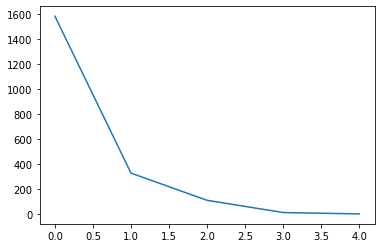

In [37]:
plt.plot(test_corpus.get_label_count_per_token_distro(conditional_rep = test_dir, return_format = 'list'))
plt.show()